In [3]:
# load new_file.csv using pandas

import pandas as pd
df = pd.read_csv('/content/new_file.csv')

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

In [27]:
'''kmean=df[['HbA1c','Hba1c_change','age','LDL','Cholesterol','HDL','Creatinine','Triglyceride','Glycemic_control']]
kmean_medicine=df[['akarboz','dapagliflozin','eksenatid','gliklazid','glimepirid','glipizid','insulin_aspart','insulin_detemir','insulin_glarjin',
                   'insulin_glusilin','insulin_lispro','insulin_nph','insulin_reguler','linagliptin','metformin_hcl','nateglinid','pioglitazon_hcl',
                   'repaglinide','saksagliptin','sitagliptin','vildagliptin','Glycemic_control']]'''

In [ ]:
'''kmean['Glycemic_control'] = kmean['Glycemic_control'].replace({0: 'Under control', 1: 'Poor control'})
kmean_medicine['Glycemic_control'] = kmean_medicine['Glycemic_control'].replace({0: 'Under control', 1: 'Poor control'})
'''

In [5]:
DF3D = df[['LDL', 'Cholesterol', 'HDL', 'Glycemic_control']].copy()
DF3D['Glycemic_control'] = DF3D['Glycemic_control'].replace({0: 'Under control', 1: 'Poor control'})
print(DF3D.head())

     LDL  Cholesterol   HDL Glycemic_control
0  118.0        203.0  55.0     Poor control
1   92.0        189.0  63.0     Poor control
2  107.2        180.0  48.0    Under control
3   80.0        168.0  36.0     Poor control
4  171.0        251.0  58.0    Under control


In [6]:
TrueLabel3D=DF3D["Glycemic_control"]

In [7]:
DF3D=DF3D.drop(['Glycemic_control'], axis=1)

In [8]:
kmeans_object3D = sklearn.cluster.KMeans(n_clusters=2)

In [9]:
kmeans_3D=kmeans_object3D.fit(DF3D)
# Get cluster assignment labels
labels3D =kmeans_3D.labels_

prediction_kmeans_3D = kmeans_object3D.predict(DF3D)

print("Prediction 3D\n")
print(prediction_kmeans_3D)
print("Actual\n")
print(TrueLabel3D)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Prediction 3D

[0 0 0 ... 1 1 0]
Actual

0         Poor control
1         Poor control
2        Under control
3         Poor control
4        Under control
             ...      
77719    Under control
77720     Poor control
77721    Under control
77722     Poor control
77723     Poor control
Name: Glycemic_control, Length: 77724, dtype: object


In [10]:
data_classes = ["Poor control", "Under control"]
dc = dict(zip(data_classes, range(0,2)))
#print(dc)
TrueLabel3D_num=TrueLabel3D.map(dc, na_action='ignore')
print(TrueLabel3D_num)


0        0
1        0
2        1
3        0
4        1
        ..
77719    1
77720    0
77721    1
77722    0
77723    0
Name: Glycemic_control, Length: 77724, dtype: int64


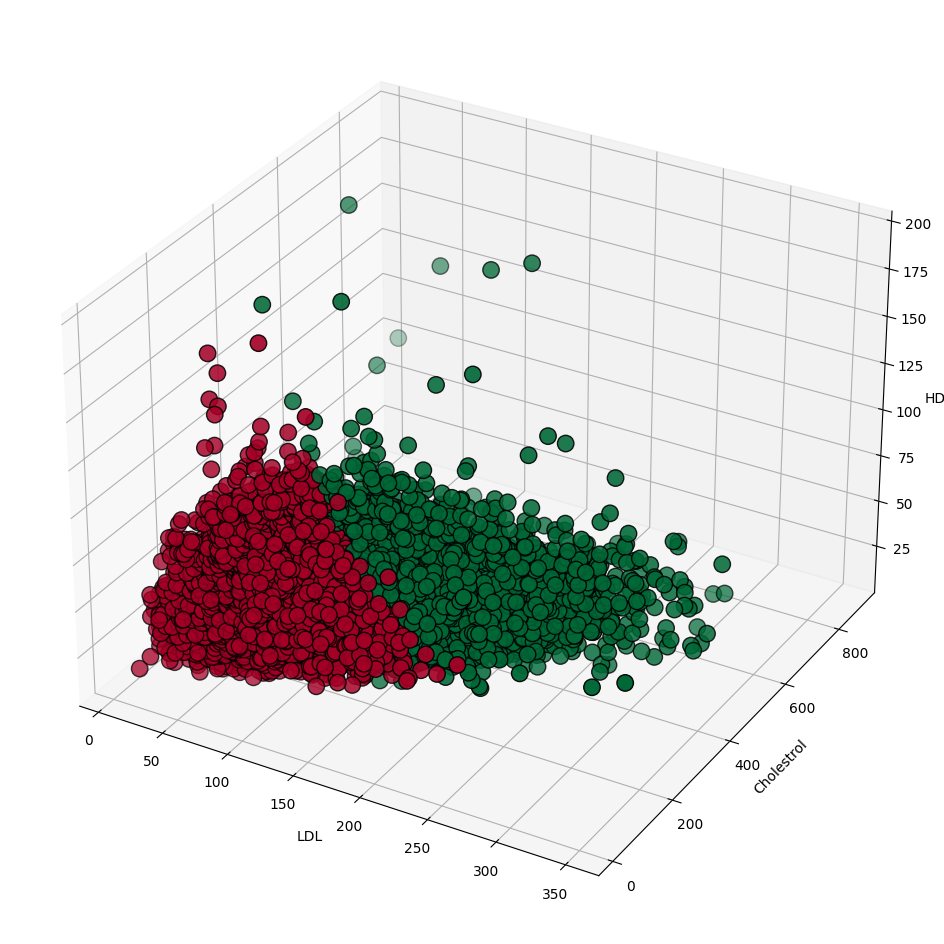

In [12]:
fig2 = plt.figure(figsize=(12, 12))
ax2 = fig2.add_subplot(111, projection='3d')  # Create a 3D axes
x = DF3D.iloc[:, 0]
y = DF3D.iloc[:, 1]
z = DF3D.iloc[:, 2]
ax2.scatter(x, y, z, cmap="RdYlGn", edgecolor='k', s=140, c=prediction_kmeans_3D)
ax2.set_xlabel('LDL', fontsize=10)
ax2.set_ylabel('Cholestrol', fontsize=10)
ax2.set_zlabel('HDL', fontsize=10)
#plt.savefig('3d_scatter_plot.png')  # Save the figure
plt.show()  # Show the figure


In [13]:
centers3D = kmeans_3D.cluster_centers_
print(centers3D)
print(centers3D[0,0])
xs=(centers3D[0,0], centers3D[1,0])
ys=(centers3D[0,1], centers3D[1,1])
zs=(centers3D[0,2], centers3D[1,2])

ax2.scatter(xs,ys,zs, c='black', s=2000, alpha=0.2)
plt.show()

[[ 99.16182957 176.4445115   45.48373643]
 [159.66503531 251.04464267  49.99182893]]
99.16182956666573


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


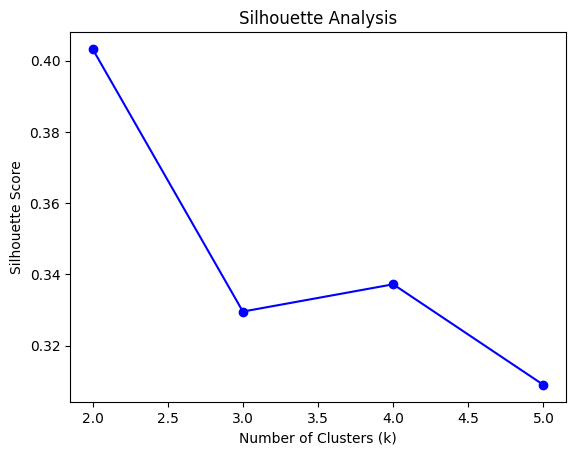

In [25]:

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
# Perform feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(DF3D[['LDL', 'Cholesterol', 'HDL']])

# Perform clustering with different values of k
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()